In [1]:
import scanpy as sc
import lamindb as ln
import numpy as np
import palantir
import cellrank as cr

→ connected lamindb: jkobject/scprint


In [2]:
adata = ln.Artifact.filter(uid="UEE9mPND42ONqZUCGBXy").one().load()

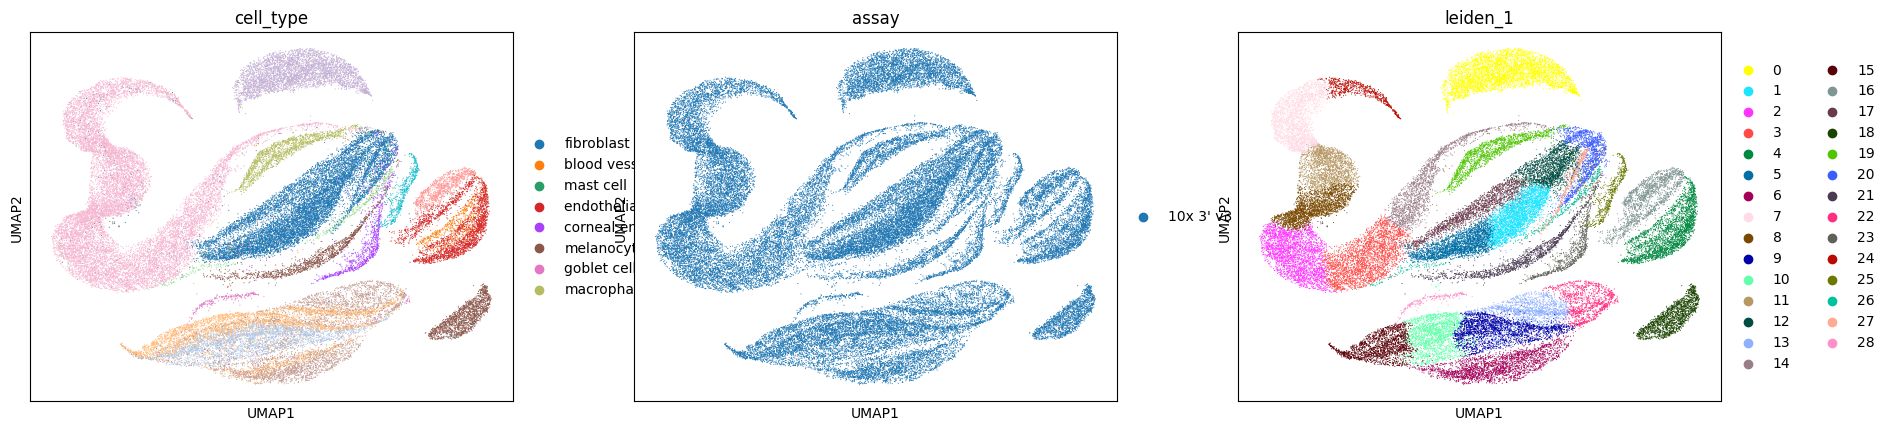

In [ ]:
sc.pl.umap(adata, color=["cell_type","assay", "leiden_1"])

In [ ]:
adata

AnnData object with n_obs × n_vars = 52309 × 70933
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leiden_2', 'le

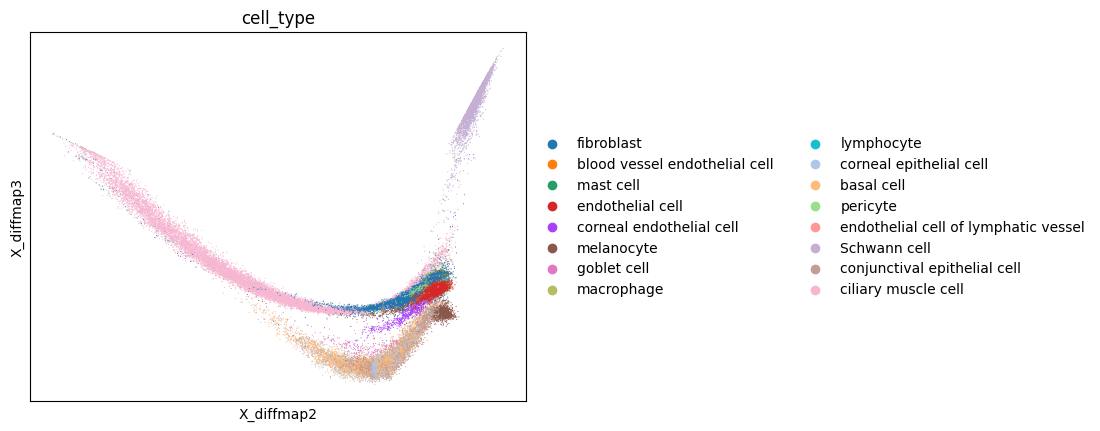

In [ ]:
sc.pl.embedding(adata, basis="X_diffmap", color=["cell_type"], components=["2, 3"],)

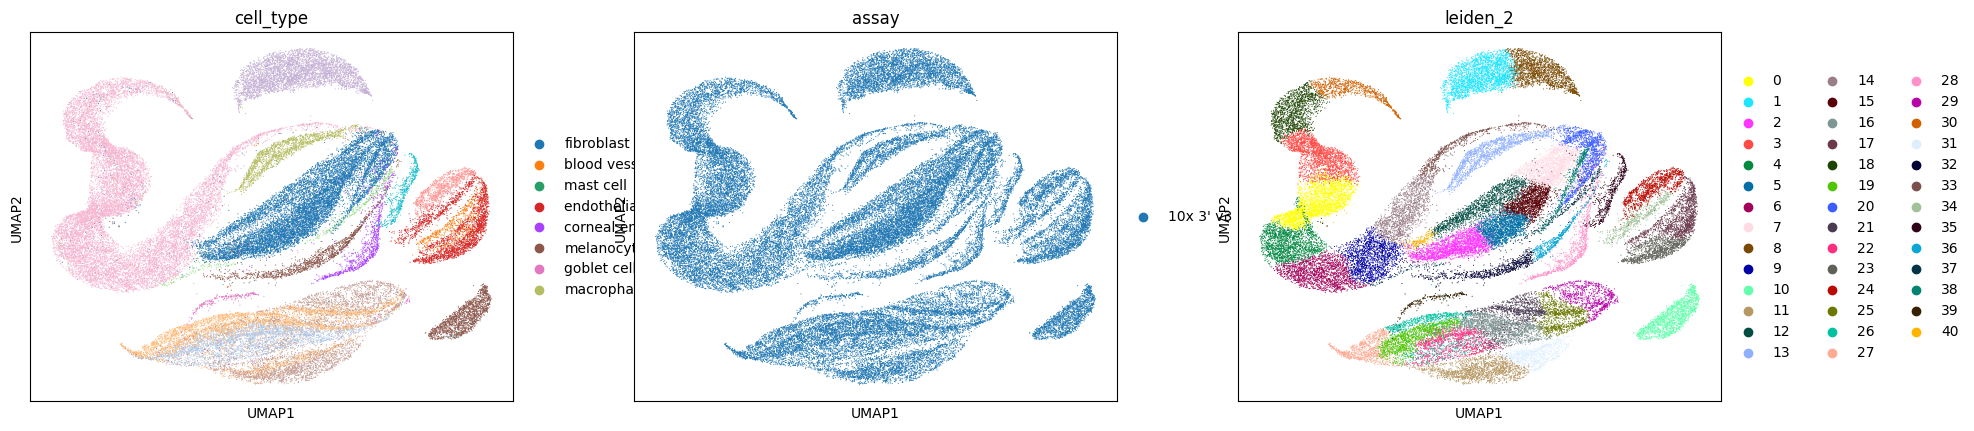

In [ ]:
sc.pl.umap(adata, color=["cell_type","assay", "leiden_2"])

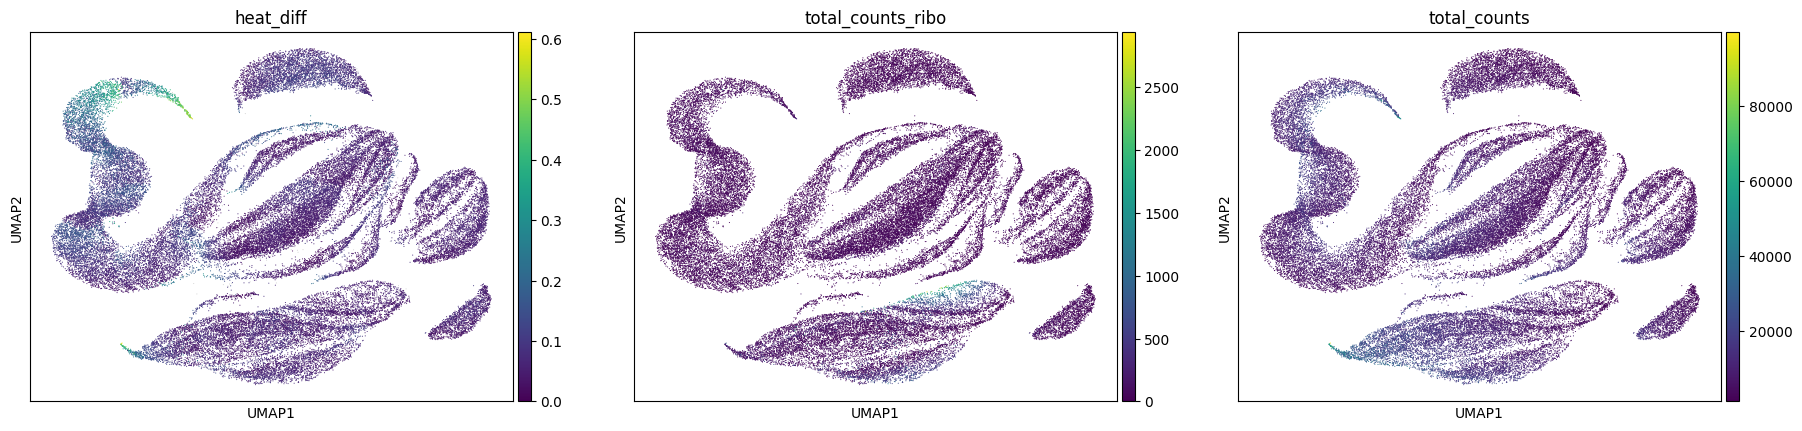

In [ ]:
sc.pl.umap(adata, color=["heat_diff", "total_counts_ribo", "total_counts"])

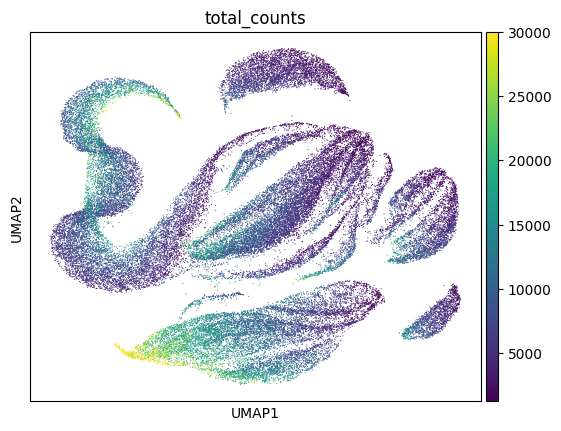

In [ ]:
sc.pl.umap(adata, color=["total_counts"], vmax=30000)

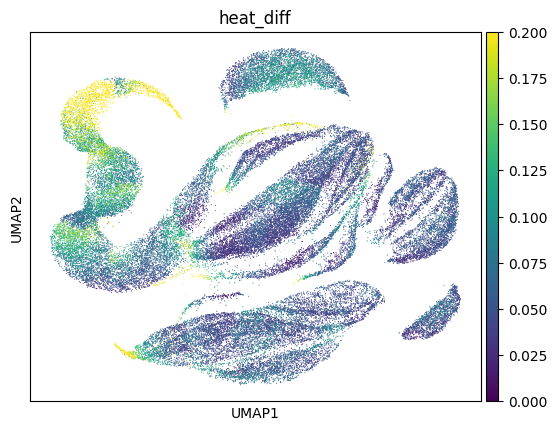

In [ ]:
sc.pl.umap(adata, color=["heat_diff"], vmax=0.2)

In [ ]:
sc.pl.umap(adata, color=["heat_diff"], vmax=0.2)

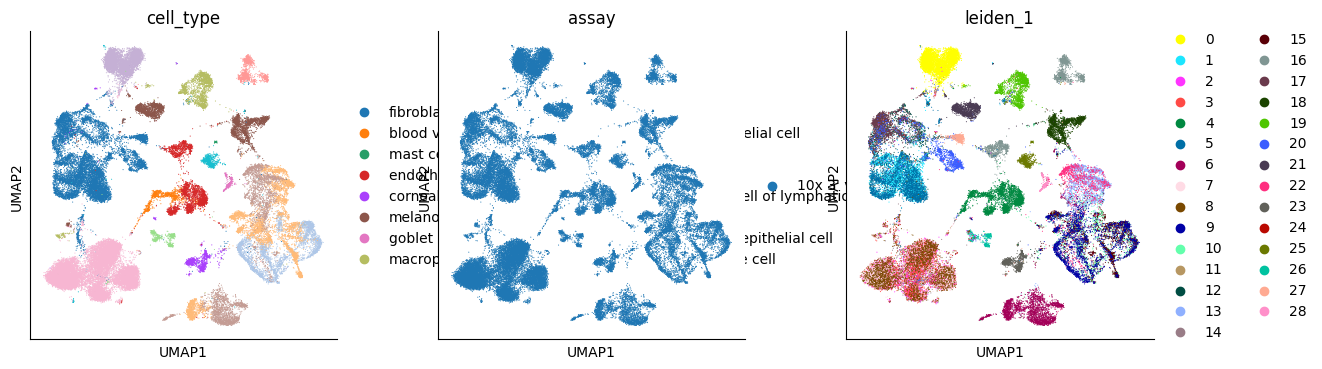

In [3]:
adata.layers["norm"] = sc.pp.normalize_total(adata, target_sum=10**4, inplace=False
    )["X"]
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    batch_key="assay_ontology_term_id",
    flavor="seurat_v3",
    subset=False,
)
sc.pp.log1p(adata, layer="norm")
sc.pp.pca(adata, n_comps=100, layer="norm")
sc.pp.neighbors(adata, use_rep="X_pca")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["cell_type","assay", "leiden_1"])

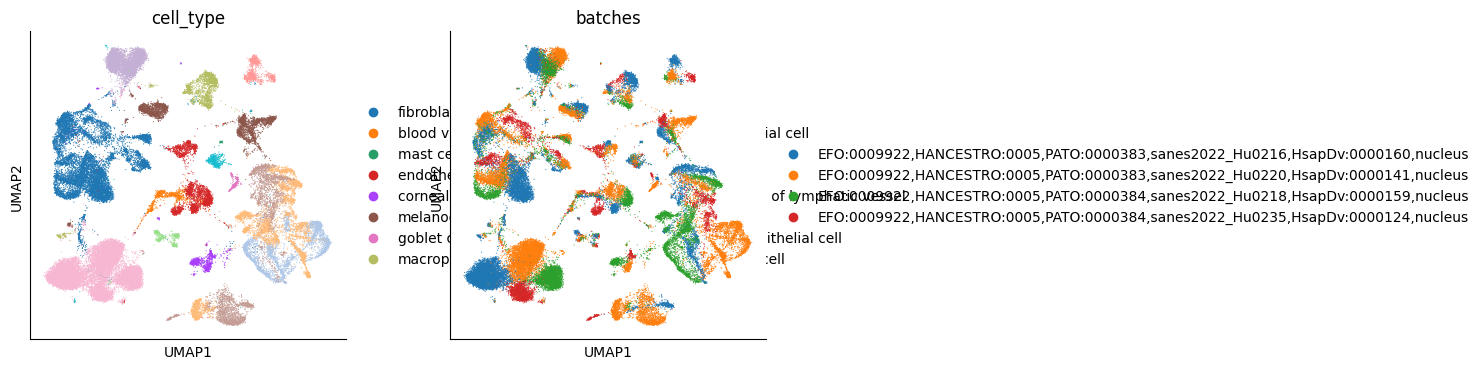

In [4]:
batches = ["assay_ontology_term_id", "self_reported_ethnicity_ontology_term_id", "sex_ontology_term_id", "donor_id", "development_stage_ontology_term_id", "suspension_type"]
adata.obs["batches"] = adata.obs[batches].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
sc.pl.umap(adata, color=["cell_type", "batches"])

In [5]:
del adata.obsp['connectivities']
del adata.obsp['distances']

In [7]:
# Sort AnnData object by 'batches'
#adata = adata[adata.obs['batches'].sort_values().index]
# sc.external.pp.scanorama_integrate(adata, key="batches")
sc.external.pp.harmony_integrate(adata, key="batches")

2024-09-20 16:28:54,547 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-09-20 16:29:01,353 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-09-20 16:29:01,548 - harmonypy - INFO - Iteration 1 of 10
2024-09-20 16:29:16,218 - harmonypy - INFO - Iteration 2 of 10
2024-09-20 16:29:32,132 - harmonypy - INFO - Iteration 3 of 10
2024-09-20 16:29:48,174 - harmonypy - INFO - Converged after 3 iterations


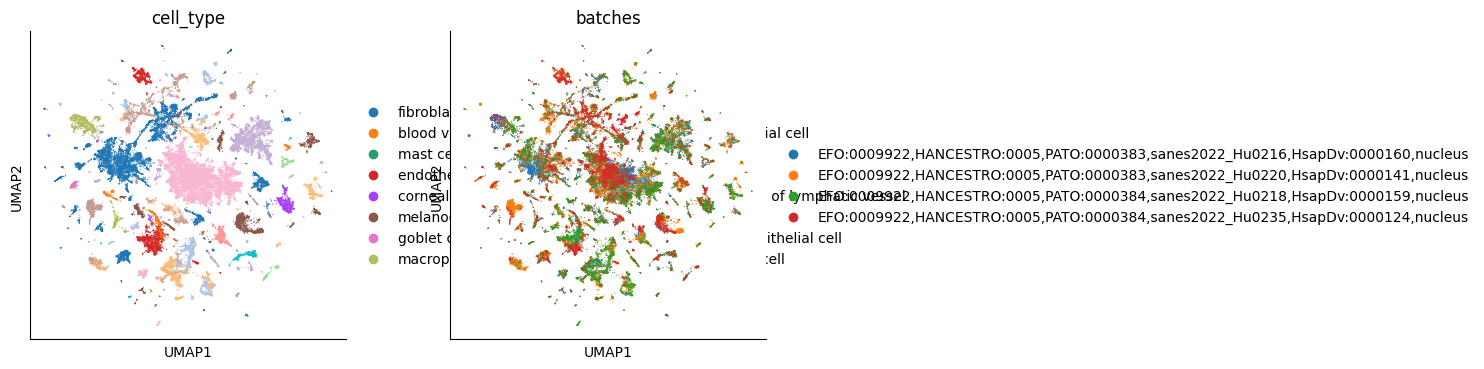

In [150]:
sc.pp.neighbors(adata, use_rep="X_scanorama")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["cell_type", "batches"])

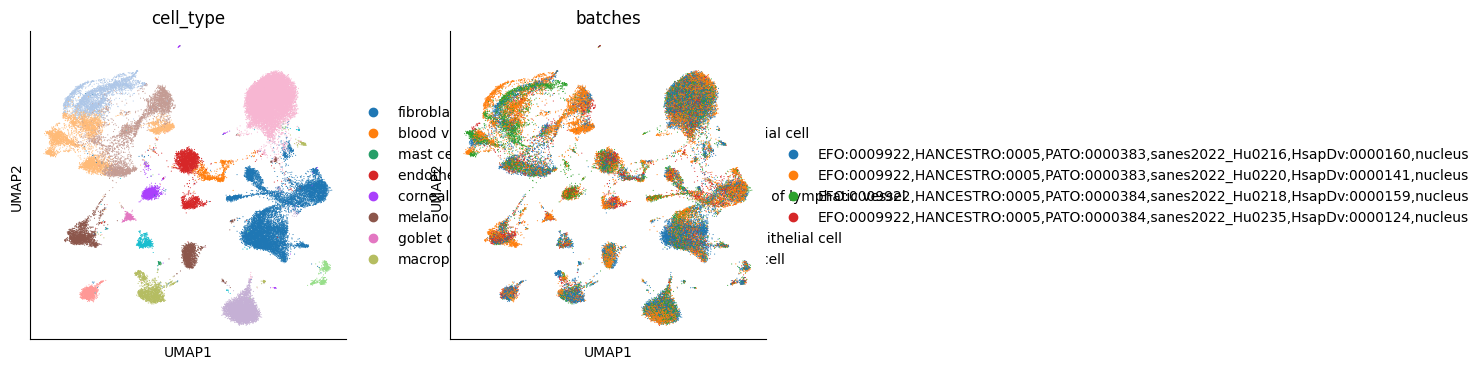

In [8]:
sc.pp.neighbors(adata, use_rep="X_pca_harmony")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["cell_type", "batches"])

In [ ]:
sc.pl.umap(adata, color=["cell_type", "batches", "total_counts"])

AttributeError: 'csr_matrix' object has no attribute 'raw'

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/phate/phate.py:190: FutureWarning: a is deprecated. Please use decay in future.
  warnings.warn("a is deprecated. Please use decay in future.", FutureWarning)


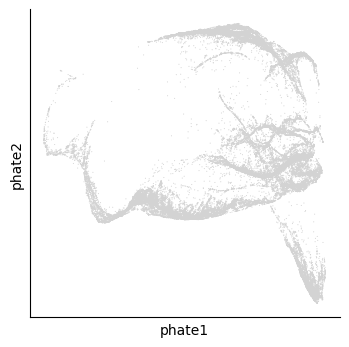

In [10]:
sc.external.tl.phate(adata, k=5, a=20, t=150)
sc.external.pl.phate(adata)

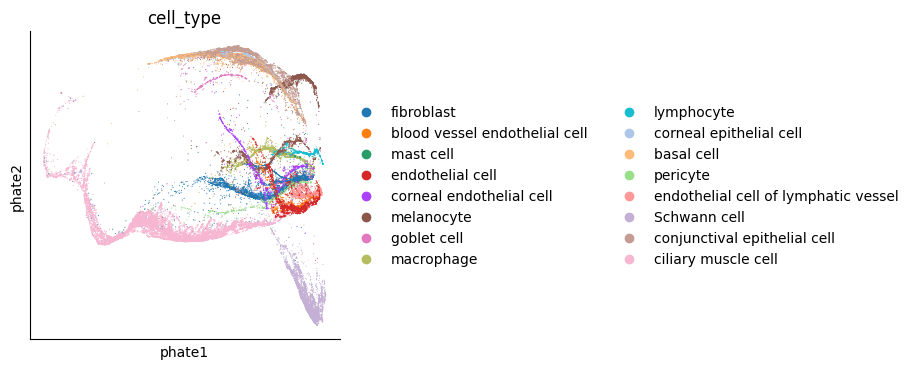

In [11]:
sc.external.pl.phate(adata, color="cell_type")

In [15]:
adata

AnnData object with n_obs × n_vars = 52309 × 70933
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leiden_2', 'le

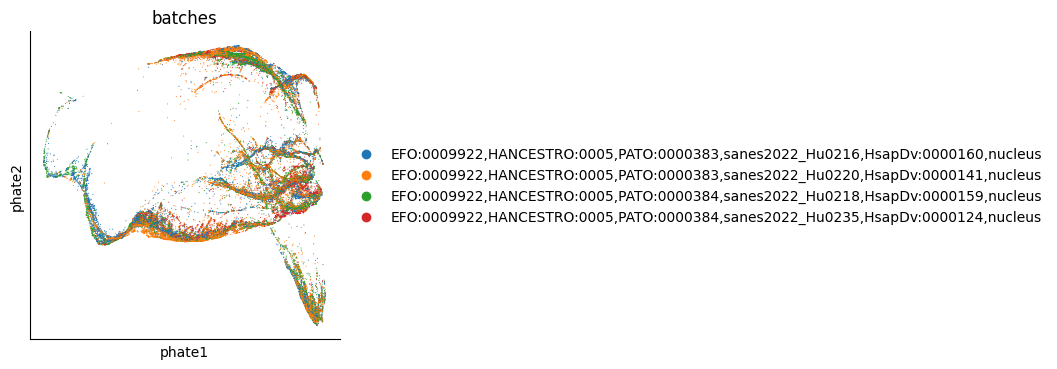

In [12]:
sc.external.pl.phate(adata, color="batches")

In [16]:
sc.tl.diffmap(adata, n_comps=20)

In [ ]:
sc.tl.palantir(adata, n_components=20)

In [23]:
palantir.utils.run_diffusion_maps(adata, n_components=20)

{'T': <52309x52309 sparse matrix of type '<class 'numpy.float32'>'
 	with 2464562 stored elements in Compressed Sparse Row format>,
 'EigenVectors':                                             0         1         2         3   \
 027c04aa-cd11-419c-adce-8662528cff90 -0.004374 -0.007622  0.000524 -0.001945   
 cd2e48b4-1e51-45cb-aff9-d921ec53bcb8 -0.004374 -0.007469  0.000477 -0.001754   
 ec540d51-d46c-4c06-8109-e82a91e19da9 -0.004374 -0.007037  0.000328 -0.000895   
 efe46263-60cc-407a-8f79-c88533496ea5 -0.004374 -0.007521  0.000502 -0.001859   
 d2dbd7f3-2531-472d-a558-62742f97bb4a -0.004374 -0.007035  0.000334 -0.000916   
 ...                                        ...       ...       ...       ...   
 8acc0fca-fcb4-4c58-8016-3f751dbf6893 -0.004374 -0.007245  0.000326 -0.001268   
 f51fbde4-007c-4a76-ace2-e1ca6eae9800 -0.004374 -0.007393  0.000358 -0.001370   
 17fc64a3-0c48-425f-8424-a3763331a2f3 -0.004374 -0.007269  0.000330 -0.001288   
 23bbbc91-53ce-44e4-a331-33e13c7a7747 -0.0

In [24]:
palantir.utils.determine_multiscale_space(adata)

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/IPython/core/formatters.py:347: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/IPython/core/formatters.py:347: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


0         1         2         3   \
027c04aa-cd11-419c-adce-8662528cff90 -10.139425  0.355754 -1.167825 -1.065134   
cd2e48b4-1e51-45cb-aff9-d921ec53bcb8  -9.935829  0.323405 -1.053316 -0.974583   
ec540d51-d46c-4c06-8109-e82a91e19da9  -9.361568  0.222247 -0.537686 -0.907911   
efe46263-60cc-407a-8f79-c88533496ea5 -10.004644  0.340470 -1.116671 -1.037409   
d2dbd7f3-2531-472d-a558-62742f97bb4a  -9.358278  0.226703 -0.550079 -0.925798   
...                                         ...       ...       ...       ...   
8acc0fca-fcb4-4c58-8016-3f751dbf6893  -9.638539  0.221322 -0.761509 -0.656154   
f51fbde4-007c-4a76-ace2-e1ca6eae9800  -9.835095  0.242942 -0.822715 -0.716028   
17fc64a3-0c48-425f-8424-a3763331a2f3  -9.669915  0.224034 -0.773264 -0.668554   
23bbbc91-53ce-44e4-a331-33e13c7a7747  -9.796039  0.230881 -0.792424 -0.700685   
51b0fff4-3f6a-414a-9dd2-9d574f3c58e8 -10.053870  0.289652 -0.916492 -0.773207   

                                            4         5         6         7   \
027c04aa-cd11-419c-adce-8662528cff90  0.243160  0.373565  0.046469  0.199121   
cd2e48b4-1e51-45cb-aff9-d921ec53bcb8  0.234415  0.317011  0.088746  0.206223   
ec540d51-d46c-4c06-8109-e82a91e19da9  0.357770  0.278854  1.108515  1.233575   
efe46263-60cc-407a-8f79-c88533496ea5  0.246173  0.364210  0.103038  0.250902   
d2dbd7f3-2531-472d-a558-62742f97bb4a  0.361296  0.295005  1.147973  1.270017   
...                                        ...       ...       ...       ...   
8acc0fca-fcb4-4c58-8016-3f751dbf6893  0.196118 -0.016342 -0.514870 -0.386095   
f51fbde4-007c-4a76-ace2-e1ca6eae9800  0.222791 -0.015552 -0.591969 -0.471141   
17fc64a3-0c48-425f-8424-a3763331a2f3  0.203103 -0.014619 -0.542976 -0.412236   
23bbbc91-53ce-44e4-a331-33e13c7a7747  0.226618 -0.001086 -0.527152 -0.409783   
51b0fff4-3f6a-414a-9dd2-9d574f3c58e8  0.218120 -0.038075 -0.738877 -0.596825   

                                            8         9         10        11  \
027c04aa-cd11-419c-adce-8662528cff90 -1.366725 -3.081827  1.454075 -0.061326   
cd2e48b4-1e51-45cb-aff9-d921ec53bcb8 -1.164569 -2.584102  1.030133 -0.034675   
ec540d51-d46c-4c06-8109-e82a91e19da9 -2.318892 -4.578043 -4.909928 -0.043763   
efe46263-60cc-407a-8f79-c88533496ea5 -1.372044 -3.071196  1.063156 -0.052989   
d2dbd7f3-2531-472d-a558-62742f97bb4a -2.419179 -4.781689 -4.908410 -0.052062   
...                                        ...       ...       ...       ...   
8acc0fca-fcb4-4c58-8016-3f751dbf6893  0.495991  0.846074 -0.408957  0.138984   
f51fbde4-007c-4a76-ace2-e1ca6eae9800  0.572869  1.063043 -0.513510  0.148380   
17fc64a3-0c48-425f-8424-a3763331a2f3  0.521439  0.908268 -0.441010  0.139027   
23bbbc91-53ce-44e4-a331-33e13c7a7747  0.531838  0.947517 -0.464099  0.151013   
51b0fff4-3f6a-414a-9dd2-9d574f3c58e8  0.541134  1.053819 -0.440701  0.111197   

                                            12        13        14        15  \
027c04aa-cd11-419c-adce-8662528cff90  0.012763 -0.001009 -0.039525 -0.434662   
cd2e48b4-1e51-45cb-aff9-d921ec53bcb8 -0.000840 -0.006458 -0.019981 -0.211455   
ec540d51-d46c-4c06-8109-e82a91e19da9  0.265560  0.046481  0.007813  0.321456   
efe46263-60cc-407a-8f79-c88533496ea5  0.023652 -0.003623 -0.033434 -0.356719   
d2dbd7f3-2531-472d-a558-62742f97bb4a  0.279448  0.050885 -0.003067  0.213994   
...                                        ...       ...       ...       ...   
8acc0fca-fcb4-4c58-8016-3f751dbf6893 -0.159375  0.000272  0.064510  0.735556   
f51fbde4-007c-4a76-ace2-e1ca6eae9800 -0.165996  0.054649  0.033244  0.475704   
17fc64a3-0c48-425f-8424-a3763331a2f3 -0.155890  0.010617  0.054397  0.642433   
23bbbc91-53ce-44e4-a331-33e13c7a7747 -0.173959  0.024243  0.061032  0.723956   
51b0fff4-3f6a-414a-9dd2-9d574f3c58e8 -0.111661  0.141741 -0.047976 -0.290258   

                                            16  
027c04aa-cd11-419c-adce-8662528cff90 -0.002226  
cd2e48b4-1e51-45cb-aff9-d921ec53bcb8 -0.000857  
ec540d51-d46c-4c06-8109-e82a91e19da9 -0.00

In [13]:
#palantir.utils.run_magic_imputation(adata)
sc.pl.embedding(
    adata,
    basis="umap",
    layer="X",
    color=["ENSG00000103196", "ENSG00000103196", "ENSG00000103196", "ENSG00000103196"],
    frameon=False,
)

KeyboardInterrupt: 

In [26]:
adata

AnnData object with n_obs × n_vars = 52309 × 70933
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leiden_2', 'le

(<Figure size 1500x1200 with 20 Axes>,
 {0: <Axes: title={'center': 'Component 0'}>,
  1: <Axes: title={'center': 'Component 1'}>,
  2: <Axes: title={'center': 'Component 2'}>,
  3: <Axes: title={'center': 'Component 3'}>,
  4: <Axes: title={'center': 'Component 4'}>,
  5: <Axes: title={'center': 'Component 5'}>,
  6: <Axes: title={'center': 'Component 6'}>,
  7: <Axes: title={'center': 'Component 7'}>,
  8: <Axes: title={'center': 'Component 8'}>,
  9: <Axes: title={'center': 'Component 9'}>,
  10: <Axes: title={'center': 'Component 10'}>,
  11: <Axes: title={'center': 'Component 11'}>,
  12: <Axes: title={'center': 'Component 12'}>,
  13: <Axes: title={'center': 'Component 13'}>,
  14: <Axes: title={'center': 'Component 14'}>,
  15: <Axes: title={'center': 'Component 15'}>,
  16: <Axes: title={'center': 'Component 16'}>,
  17: <Axes: title={'center': 'Component 17'}>,
  18: <Axes: title={'center': 'Component 18'}>,
  19: <Axes: title={'center': 'Component 19'}>})

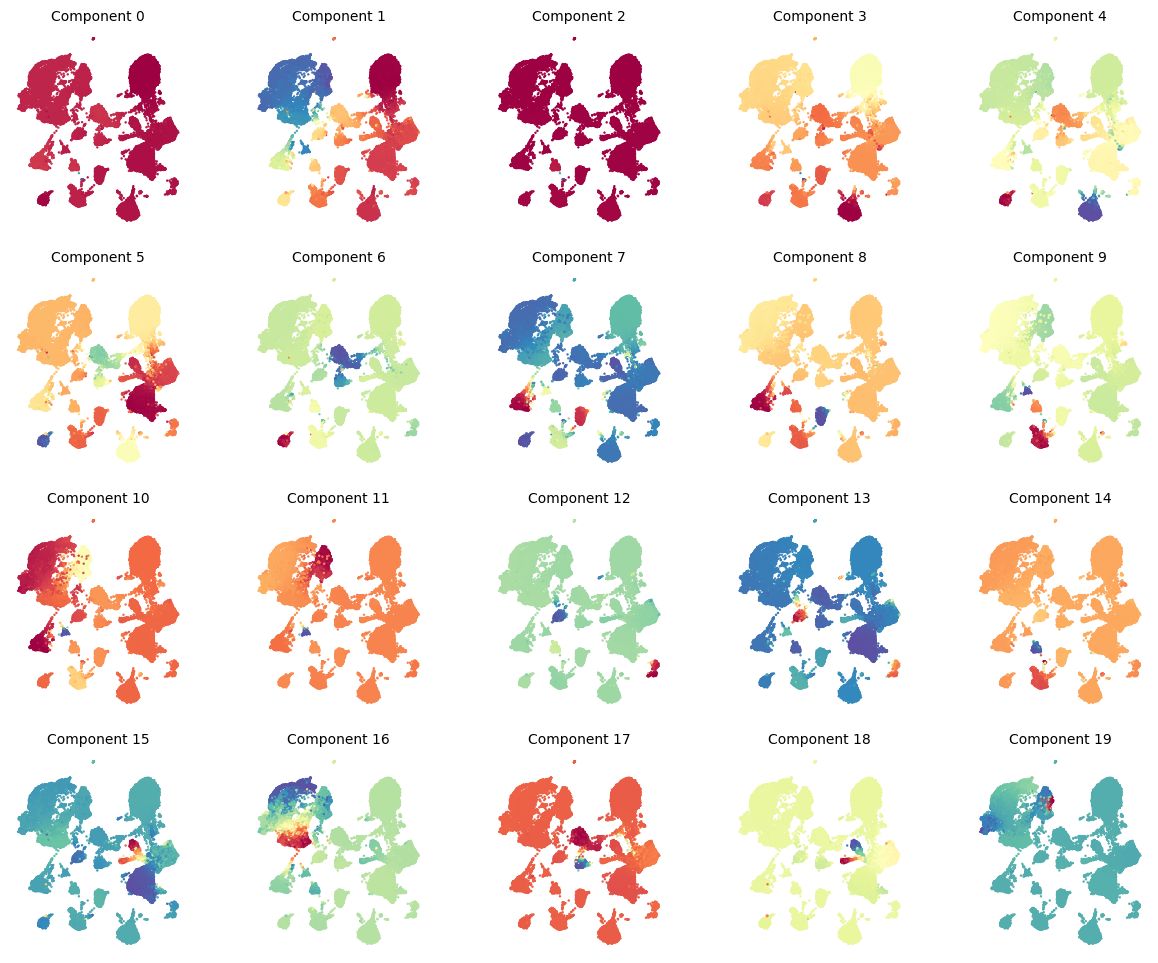

In [28]:
palantir.plot.plot_diffusion_components(adata)

In [29]:
terminal_states = palantir.utils.find_terminal_states(adata, celltypes=adata.obs.cell_type_ontology_term_id.unique(),celltype_column="cell_type_ontology_term_id")
terminal_states

Using a1c21b87-e3b8-4677-b011-db917a1d5fd3 for cell type CL:1000432 which is min in diffusion component 0.
Using 206ae424-f32e-4c2f-907a-c64d77385908 for cell type CL:0000235 which is max in diffusion component 8.
Using 7df13e48-1377-46bc-9cc3-ff5866f3dc17 for cell type CL:0002573 which is max in diffusion component 2.
Using 9b1e206a-1722-4f3a-9217-74aa3094e39e for cell type CL:0000115 which is min in diffusion component 5.
Using cda58993-e1b9-44bc-b90b-b318809ae8d3 for cell type CL:0000057 which is max in diffusion component 4.
Using 29afba2c-b6ee-4c50-b1c4-b1b7ab7c4d02 for cell type CL:0000132 which is min in diffusion component 11.
Using b83a6473-a1b2-447c-9aad-4008a13fe3ec for cell type CL:0000542 which is min in diffusion component 13.
Using a635d46d-353e-49a7-9104-81f5f940d0a7 for cell type CL:0002138 which is max in diffusion component 3.
Using bb210f74-9f00-4806-b6c9-9e4c325fff8b for cell type CL:0000160 which is min in diffusion component 8.
Using 7c81f7e9-1b55-4e7d-b305-a982f

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/palantir/utils.py:835: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ad.obs[celltype_column][ec] == celltype:
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/palantir/utils.py:838: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ad.obs[celltype_column][ec] == celltype:
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/palantir/utils.py:949: UserWarning: No valid component found: CL:0000646 Consider increasing the number of diffusion components ('n_components' in palantir.utils.run_diffusion_maps). The cell type CL:

a1c21b87-e3b8-4677-b011-db917a1d5fd3    CL:1000432
206ae424-f32e-4c2f-907a-c64d77385908    CL:0000235
7df13e48-1377-46bc-9cc3-ff5866f3dc17    CL:0002573
9b1e206a-1722-4f3a-9217-74aa3094e39e    CL:0000115
cda58993-e1b9-44bc-b90b-b318809ae8d3    CL:0000057
29afba2c-b6ee-4c50-b1c4-b1b7ab7c4d02    CL:0000132
b83a6473-a1b2-447c-9aad-4008a13fe3ec    CL:0000542
a635d46d-353e-49a7-9104-81f5f940d0a7    CL:0002138
bb210f74-9f00-4806-b6c9-9e4c325fff8b    CL:0000160
7c81f7e9-1b55-4e7d-b305-a982ff4abab3    CL:0000575
9a565f99-a6d9-4090-b449-6a0351da8e98    CL:0000148
8b60021b-b894-4f21-91c8-6fa8dbacec65    CL:1000443
33e5508e-f750-4796-8f4e-7bcca38e8e0e    CL:0000669
7c65d960-33dc-46e1-b4cb-90de779ac2f1    CL:0000097
dtype: object

(<Figure size 400x400 with 1 Axes>, <Axes: >)

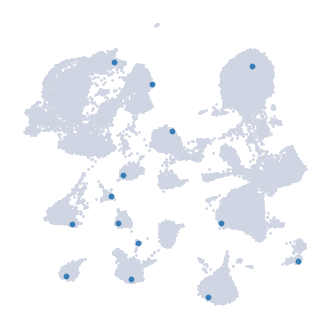

In [30]:
palantir.plot.highlight_cells_on_umap(adata, terminal_states.index.tolist())

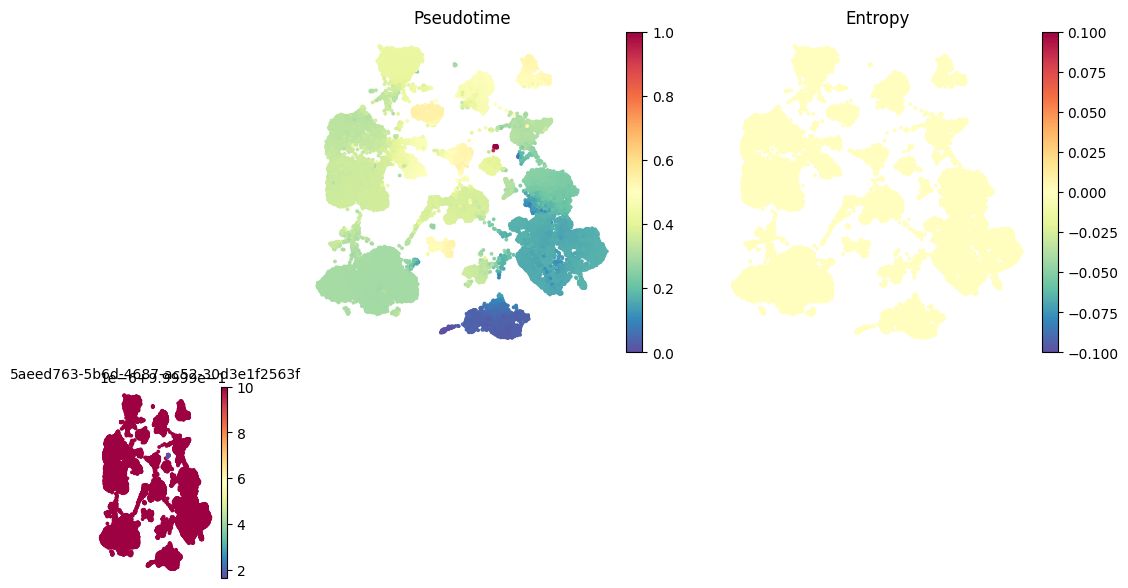

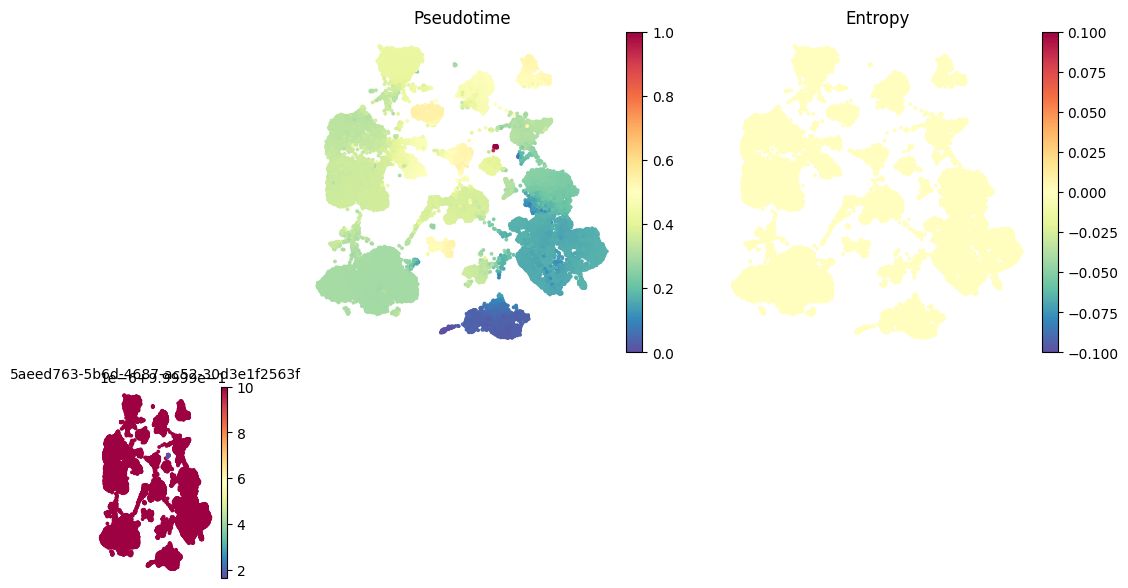

In [ ]:
palantir.plot.plot_palantir_results(adata, s=3)

In [32]:
adata.obs["heat_diff"] = 1
for terminal_state in terminal_states.index.tolist():
    adata.uns['iroot'] = np.where(adata.obs.index==terminal_state)[0][0]
    sc.tl.dpt(adata)
    adata.obs["heat_diff"] = np.minimum(adata.obs["heat_diff"], adata.obs["dpt_pseudotime"])

In [33]:
adata.uns['iroot'] = np.where(adata.obs.index==terminal_states.index.tolist()[0])[0][0]
sc.tl.dpt(adata)

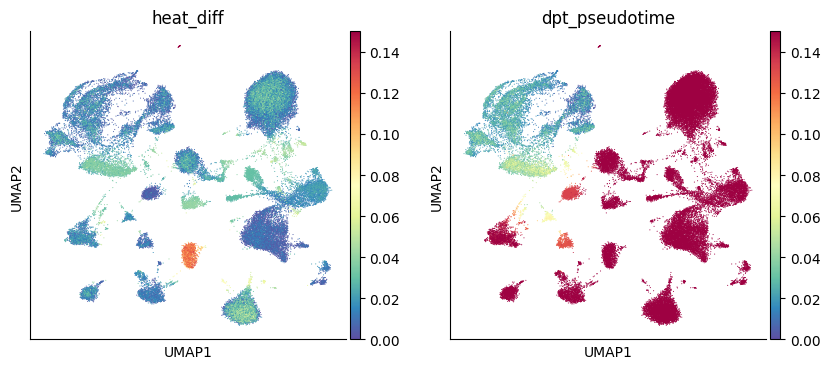

In [38]:
sc.pl.umap(adata, color=["heat_diff", "dpt_pseudotime"], vmax=0.15) #'palantir_pseudotime'

  0%|          | 0/52309 [00:00<?, ?cell/s]

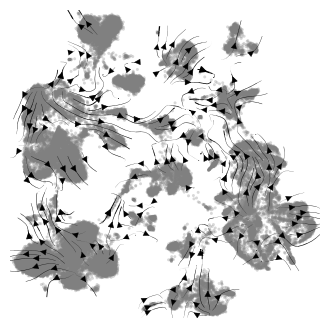

In [ ]:
pk = cr.kernels.PseudotimeKernel(adata, time_key="palantir_pseudotime")
pk.compute_transition_matrix()
pk.plot_projection(basis="umap", recompute=True)


  0%|          | 0/52309 [00:00<?, ?cell/s]

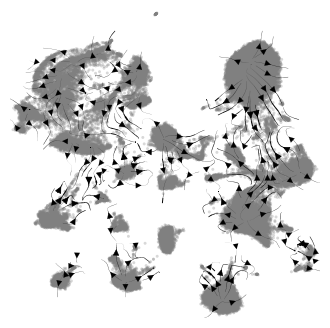

In [41]:
pk = cr.kernels.PseudotimeKernel(adata, time_key="heat_diff")
pk.compute_transition_matrix()
pk.plot_projection(basis="umap", recompute=True)

  0%|          | 0/52309 [00:00<?, ?cell/s]

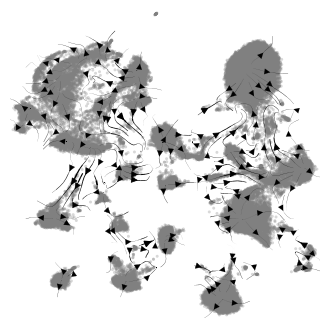

In [43]:
pk = cr.kernels.PseudotimeKernel(adata, time_key="dpt_pseudotime")
pk.compute_transition_matrix()
pk.plot_projection(basis="umap", recompute=True)

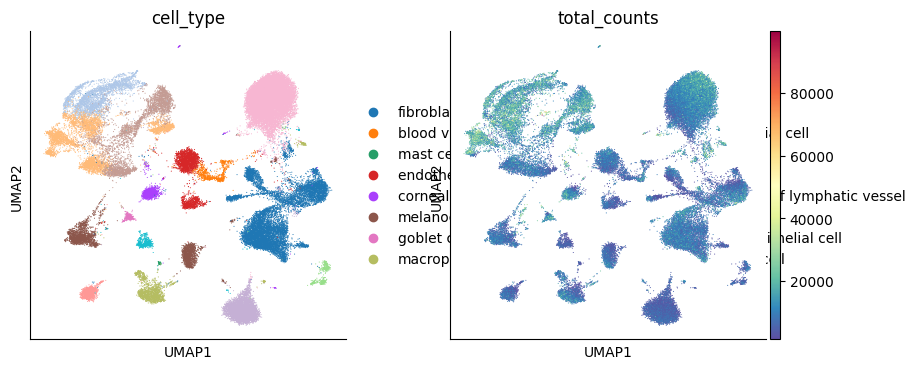

In [75]:
sc.pl.umap(adata, color=["cell_type", "total_counts"])

(<Figure size 400x400 with 1 Axes>, <Axes: >)

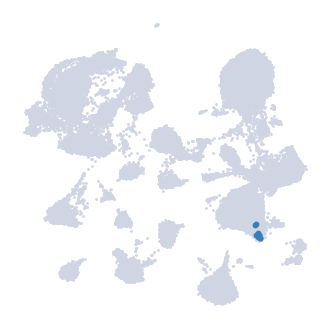

In [148]:
# Get the indices and data for the first row (index 0)
x=10210
top = 13
#csr = pk.connectivities
#csr = adata.obsp['DM_Similarity']
csr = adata.obsp['connectivities']
y = csr[x].nonzero()[1]
da = csr[x,y].data
args = da.argsort()

# Sort the indices based on the data values
palantir.plot.highlight_cells_on_umap(adata, adata.obs.iloc[y[args][:top]].index.tolist()+adata.obs.iloc[[x]].index.tolist())

In [16]:
adata.obsm["X_diffmap"] = adata.obsm['DM_EigenVectors_multiscaled']

In [17]:
adata.obs["heat_diff"] = 1
for terminal_state in terminal_states.index.tolist():
    adata.uns['iroot'] = np.where(adata.obs.index==terminal_state)[0][0]
    sc.tl.dpt(adata, n_dcs=10)
    adata.obs["heat_diff"] = np.minimum(adata.obs["heat_diff"], adata.obs["dpt_pseudotime"])

In [18]:
adata.uns['iroot'] = np.where(adata.obs.index==terminal_states.index.tolist()[0])[0][0]
sc.tl.dpt(adata)

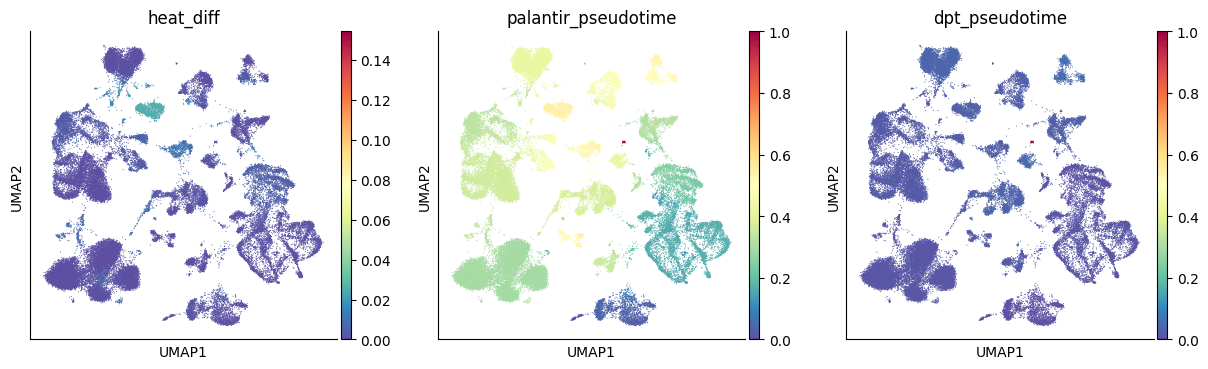

In [19]:
sc.pl.umap(adata, color=["heat_diff", "palantir_pseudotime", "dpt_pseudotime"])

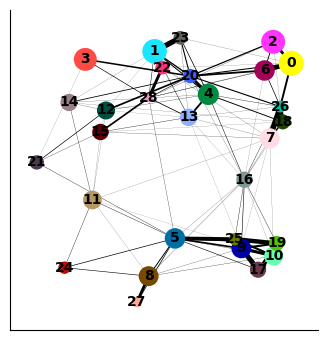

In [ ]:
sc.tl.paga(adata, groups="leiden_0.5")
sc.pl.paga(adata)

In [ ]:
sc.tl.leiden(adata, key_added="leiden_2", resolution=2.0)
sc.tl.leiden(adata, key_added="leiden_1", resolution=1.0)
sc.tl.leiden(adata, key_added="leiden_0.5", resolution=0.5)

/tmp/ipykernel_648982/1122260751.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added="leiden_2", resolution=2.0)


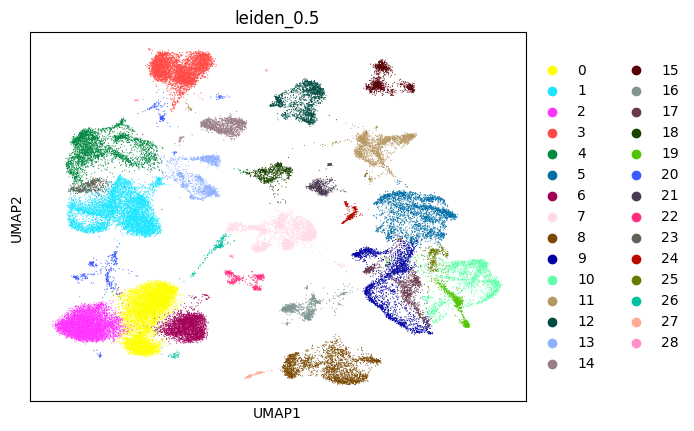

In [ ]:
sc.pl.umap(adata, color=["leiden_0.5"])

In [14]:
adata

AnnData object with n_obs × n_vars = 52309 × 70933
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leiden_2', 'le